In [1]:
import pandas as pd
df = pd.read_csv("Order_Data_meriskill.csv")
df.head(10)

C:\Users\rajesh\AppData\Local\Temp\ipykernel_42768\2220354580.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Order_Data_meriskill.csv")


,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender,PriceOutlier
0,SO45080,Northwest,United States,14657,John Thomas,BK-R50B-58,Plants,1,1.0,413.1463,699.0982,2020-01-01,Meta-ads,I4127227587819694,False,CREDITCARD,DISCOVER,M,Yes
1,SO45079,Southwest,United States,29255,Kyle Washington,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,2020-01-01,Google-ads,E9525730529761877,False,CREDITCARD,MC,M,Yes
2,SO45082,Australia,Australia,11455,Ross Sanz,BK-M82B-44,Plants,1,1.0,1898.0944,3374.9900,2020-01-01,Google-ads,Z6376643485803420,False,CREDITCARD,VISA,M,Yes
3,SO45081,Canada,Canada,26782,Seth Lewis,BK-R50B-44,Plants,1,1.0,413.1463,699.0982,2020-01-01,Google-ads,R8609290025411138,False,CREDITCARD,VISA,M,Yes
4,SO45083,United Kingdom,United Kingdom,14947,Alejandro Chen,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,2020-01-02,Meta-ads,Y9572700698484288,False,CREDITCARD,VISA,M,Yes
5,SO45084,Southwest,United States,29143,Grace Jenkins,BK-R93R-62,Plants,1,1.0,2171.2942,3578.2700,2020-01-02,Yt-Campaign,W9847720367646182,False,CREDITCARD,MC,M,Yes
6,SO45086,Australia,Australia,18747,Jacquelyn Diaz,BK-R93R-56,Plants,1,1.0,2171.2942,3578.2700,2020-01-02,Google-ads,U5867366267578316,False,CREDITCARD,VISA,M,Yes
7,SO45085,Australia,Australia,18746,Reginald Alvarez,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,2020-01-02,Google-ads,K2049522469066731,False,CREDITCARD,MC,M,Yes
8,SO45093,Australia,Australia,18906,Adrienne Gutierrez,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,2020-01-03,Google-ads,Y3541188796364090,False,CREDITCARD,VISA,M,Yes
9,SO45090,Southwest,United States,29170,Alexandra Adams,BK-R93R-62,Plants,1,1.0,2171.2942,3578.2700,2020-01-03,Yt-Campaign,F5689640947178158,False,CREDITCARD,Not Provided,M,Yes


In [2]:
df=df.drop_duplicates()

In [3]:

# Example: fill missing Customer_Name with "Unknown"
df['Customer_Name'] = df['Customer_Name'].fillna('Unknown')

# Fill missing AcquisitionSource with "Other"
df['AcquisitionSource'] = df['AcquisitionSource'].fillna('Other')

# Fraud column – fill missing as "Unknown"
df['Fraud'] = df['Fraud'].fillna('Unknown')

# CardType & Gender – fill missing with "Not Provided"
df['CardType'] = df['CardType'].fillna('Not Provided')
df['Gender'] = df['Gender'].fillna('Not Provided')


In [4]:
# Convert ProductPrice to numeric
df['ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce')

# Convert OrderDate to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce', dayfirst=True)


In [5]:
# Remove unwanted characters (\r)
df['AcquisitionSource'] = df['AcquisitionSource'].str.strip()

# Standardize Customer_Name to Title Case
df['Customer_Name'] = df['Customer_Name'].str.title()

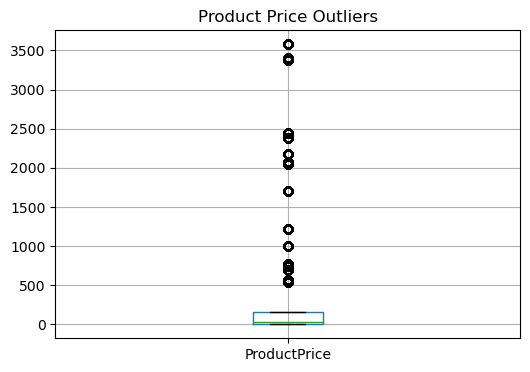

In [6]:
Q1 = df['ProductPrice'].quantile(0.25)
Q3 = df['ProductPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['PriceOutlier'] = df['ProductPrice'].apply(lambda x: 'Yes' if (x < lower_bound or x > upper_bound) else 'No')

# Check
df[['ProductPrice', 'PriceOutlier']].head(10)


import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df.boxplot(column=['ProductPrice'])
plt.title("Product Price Outliers")
plt.show()

In [7]:
df['Gender'] = df['Gender'].replace(['N','X','Y','P','S','U'], 'F')

In [8]:
df['Gender'].unique()

array(['M', 'Not Provided', 'F'], dtype=object)

In [9]:
# Round off Order Quantity to whole numbers
df['OrderQuantity'] = df['OrderQuantity'].round()

# Display the first few rows to verify the changes
print("Sample of rounded Order Quantities:")
print(df[['OrderQuantity']].head())

Sample of rounded Order Quantities:
   OrderQuantity
0            1.0
1            1.0
2            1.0
3            1.0
4            1.0


In [10]:

print(df['OrderQuantity'].unique())

[1. 2. 3.]


In [11]:
# Fill missing values with the median price (using median instead of mean to handle outliers better)
median_price = df['ProductPrice'].median()
df['ProductPrice'] = df['ProductPrice'].fillna(median_price)


In [12]:
# Check missing values in OrderDate
print("Number of missing values in OrderDate:", df['OrderDate'].isna().sum())

# Get the median date to fill missing values
median_date = df['OrderDate'].median()

# Fill missing dates with the median date
df['OrderDate'] = df['OrderDate'].fillna(median_date)

# Verify the changes
print("\nSample of OrderDate values after cleaning:")
print(df[['OrderDate']].head())

# Check if there are still any NaT (Not a Time) values
print("\nNumber of missing values after filling:", df['OrderDate'].isna().sum())

Number of missing values in OrderDate: 0

Sample of OrderDate values after cleaning:
   OrderDate
0 2020-01-01
1 2020-01-01
2 2020-01-01
3 2020-01-01
4 2020-01-02

Number of missing values after filling: 0


In [13]:
df.head(10)

,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender,PriceOutlier
0,SO45080,Northwest,United States,14657,John Thomas,BK-R50B-58,Plants,1,1.0,413.1463,699.0982,2020-01-01,Meta-ads,I4127227587819694,False,CREDITCARD,DISCOVER,M,Yes
1,SO45079,Southwest,United States,29255,Kyle Washington,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,2020-01-01,Google-ads,E9525730529761877,False,CREDITCARD,MC,M,Yes
2,SO45082,Australia,Australia,11455,Ross Sanz,BK-M82B-44,Plants,1,1.0,1898.0944,3374.9900,2020-01-01,Google-ads,Z6376643485803420,False,CREDITCARD,VISA,M,Yes
3,SO45081,Canada,Canada,26782,Seth Lewis,BK-R50B-44,Plants,1,1.0,413.1463,699.0982,2020-01-01,Google-ads,R8609290025411138,False,CREDITCARD,VISA,M,Yes
4,SO45083,United Kingdom,United Kingdom,14947,Alejandro Chen,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,2020-01-02,Meta-ads,Y9572700698484288,False,CREDITCARD,VISA,M,Yes
5,SO45084,Southwest,United States,29143,Grace Jenkins,BK-R93R-62,Plants,1,1.0,2171.2942,3578.2700,2020-01-02,Yt-Campaign,W9847720367646182,False,CREDITCARD,MC,M,Yes
6,SO45086,Australia,Australia,18747,Jacquelyn Diaz,BK-R93R-56,Plants,1,1.0,2171.2942,3578.2700,2020-01-02,Google-ads,U5867366267578316,False,CREDITCARD,VISA,M,Yes
7,SO45085,Australia,Australia,18746,Reginald Alvarez,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,2020-01-02,Google-ads,K2049522469066731,False,CREDITCARD,MC,M,Yes
8,SO45093,Australia,Australia,18906,Adrienne Gutierrez,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,2020-01-03,Google-ads,Y3541188796364090,False,CREDITCARD,VISA,M,Yes
9,SO45090,Southwest,United States,29170,Alexandra Adams,BK-R93R-62,Plants,1,1.0,2171.2942,3578.2700,2020-01-03,Yt-Campaign,F5689640947178158,False,CREDITCARD,Not Provided,M,Yes


In [14]:
# Save the updated DataFrame with cleaned OrderDate back to CSV
df.to_csv("meriskill_Analysis_jupyter.csv", index=False)
print("File has been successfully updated with cleaned OrderDate values!")

File has been successfully updated with cleaned OrderDate values!
